This Prediction Model focuses on using the data set to predict whether a patient is more likely to have a heart disease or not. We will be using the random forest machine learning model to predict the outcome.

url sample = https://www.kaggle.com/neisha/heart-disease-prediction-using-logistic-regression/data?select=framingham.csv

Step 1 - Running the different packages required

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sn
from scipy import stats
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [6]:
df = pd.read_csv('framingham.csv', header = 0 , index_col = 0)

In [7]:
df.head()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [8]:
df.tail()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [9]:
# data is not consistent but still serviceable

Variables :
Each attribute is a potential risk factor. There are both demographic, behavioural and medical risk factors.

Demographic: sex: male or female;(Nominal)

age: age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
Behavioural

currentSmoker: whether or not the patient is a current smoker (Nominal)

cigsPerDay: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarretts, even half a cigarette.)

Medical( history):

BPMeds: whether or not the patient was on blood pressure medication (Nominal)

prevalentStroke: whether or not the patient had previously had a stroke (Nominal)

prevalentHyp: whether or not the patient was hypertensive (Nominal)

diabetes: whether or not the patient had diabetes (Nominal)

Medical(current):

totChol: total cholesterol level (Continuous)

sysBP: systolic blood pressure (Continuous)

diaBP: diastolic blood pressure (Continuous)

BMI: Body Mass Index (Continuous)

heartRate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

glucose: glucose level (Continuous)

Predict variable (desired target):

10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)

In [10]:
df.count()

age                4240
education          4135
currentSmoker      4240
cigsPerDay         4211
BPMeds             4187
prevalentStroke    4240
prevalentHyp       4240
diabetes           4240
totChol            4190
sysBP              4240
diaBP              4240
BMI                4221
heartRate          4239
glucose            3852
TenYearCHD         4240
dtype: int64

In [11]:
df.dtypes

age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [12]:
# data is already fixed for dummy variables

In [13]:
df.isnull().sum()

age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
# It seems data is a lot of null or NAN values. We have decided to delete them to make our model work better.

In [15]:
df = df.dropna()

In [16]:
df.count()

age                3658
education          3658
currentSmoker      3658
cigsPerDay         3658
BPMeds             3658
prevalentStroke    3658
prevalentHyp       3658
diabetes           3658
totChol            3658
sysBP              3658
diaBP              3658
BMI                3658
heartRate          3658
glucose            3658
TenYearCHD         3658
dtype: int64

In [17]:
# As you can see the NAN values are deleted.

In [18]:
df.tail()

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,,,,,,,,,,,,,,,
1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [22]:
# compared with the previous df.tail() the NAN value is taken cared off.

In [29]:
# To check how the each variable data is distributed

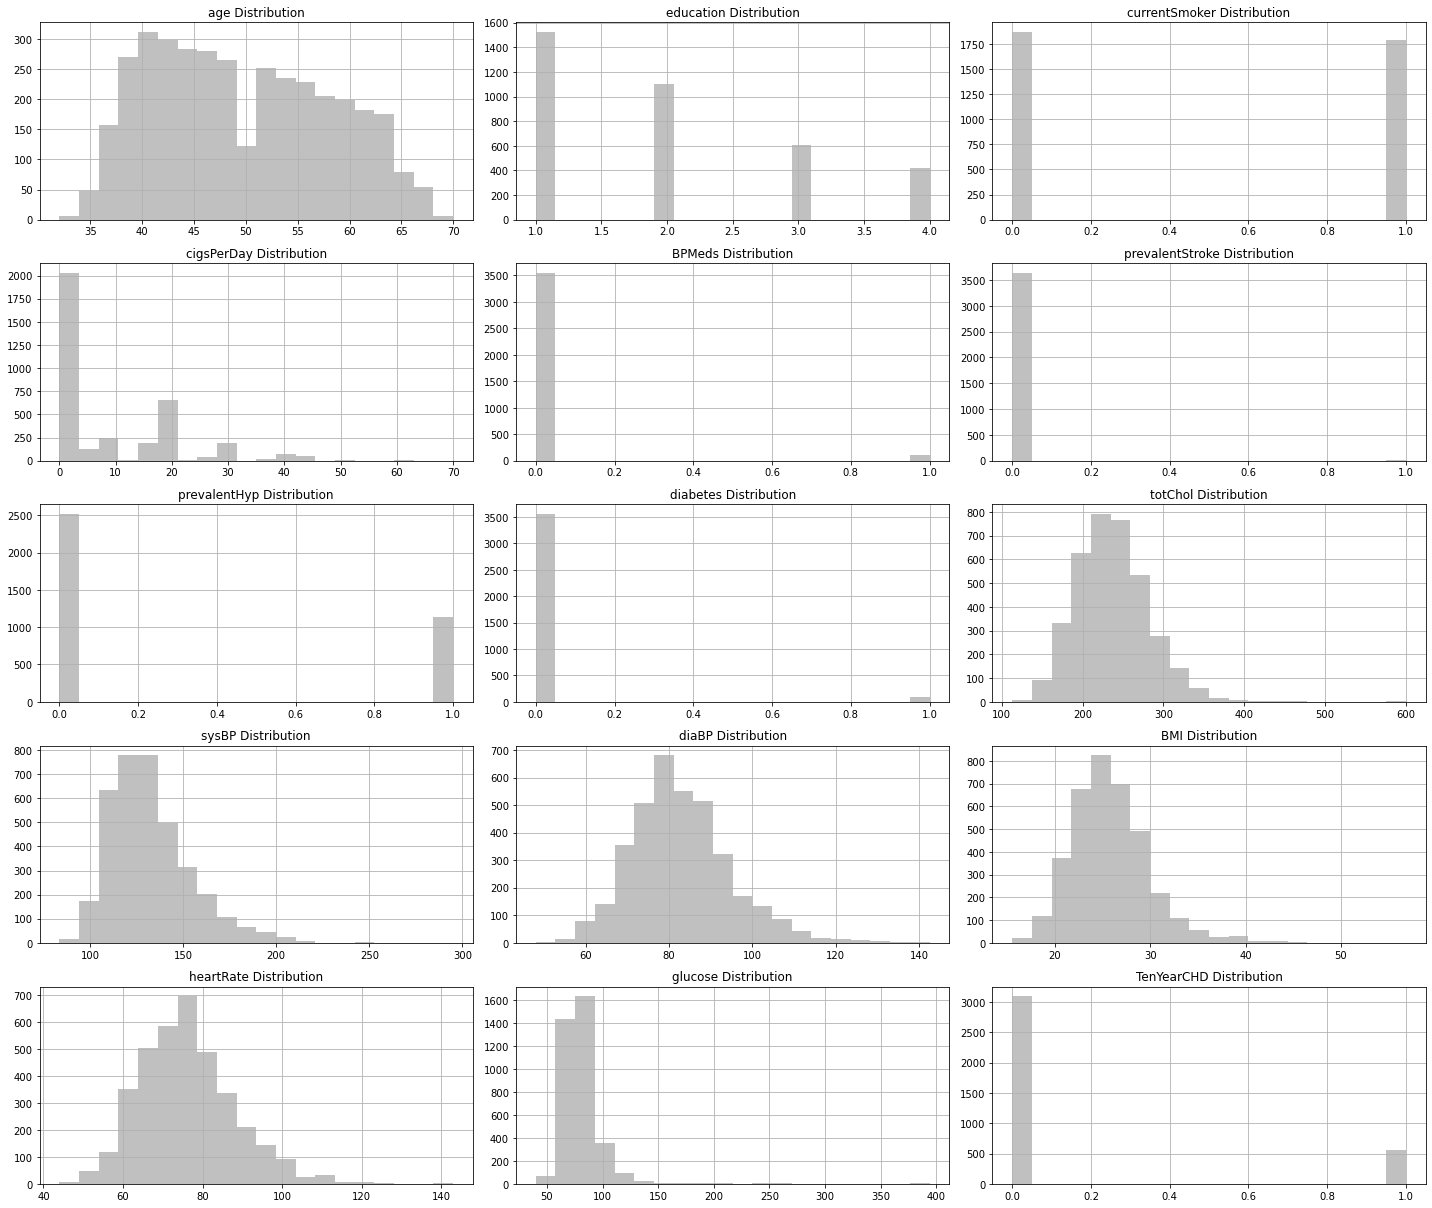

In [34]:
def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='silver')
        ax.set_title(feature+" Distribution",color='black')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(df,df.columns,6,3)

In [30]:
df.TenYearCHD.value_counts()

0    3101
1     557
Name: TenYearCHD, dtype: int64

<AxesSubplot:xlabel='TenYearCHD', ylabel='count'>

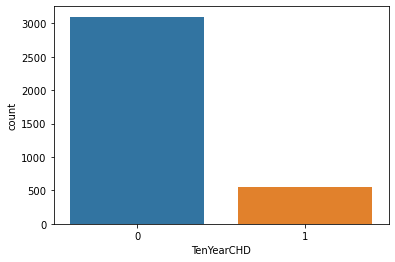

In [33]:
sn.countplot(x='TenYearCHD',data=df)

As you can see there are only 557 confirmed cases of heart disease

In [20]:
# Finding Correlations

In [38]:
df.rank()
df.corr('kendall')

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.140827,-0.173120,-0.158160,0.107841,0.042549,0.253487,0.090174,0.201879,0.268251,0.146161,0.100266,-0.003723,0.077605,0.191679
education,-0.140827,1.000000,0.029396,0.020866,-0.013228,-0.026864,-0.079058,-0.041378,-0.016210,-0.100432,-0.051699,-0.109307,-0.038282,-0.017248,-0.069250
currentSmoker,-0.173120,0.029396,1.000000,0.846276,-0.051923,-0.038150,-0.108078,-0.041849,-0.042078,-0.110639,-0.101115,-0.135773,0.049487,-0.063807,0.019165
cigsPerDay,-0.158160,0.020866,0.846276,1.000000,-0.047113,-0.036634,-0.087620,-0.036644,-0.031270,-0.085596,-0.069228,-0.097957,0.050749,-0.064400,0.035587
BPMeds,0.107841,-0.013228,-0.051923,-0.047113,1.000000,0.113125,0.262910,0.049066,0.072937,0.175091,0.151129,0.074218,-0.003341,0.009796,0.089152
prevalentStroke,0.042549,-0.026864,-0.038150,-0.036634,0.113125,1.000000,0.066057,0.009625,0.013760,0.050986,0.046494,0.015117,-0.010413,0.008322,0.048366
prevalentHyp,0.253487,-0.079058,-0.108078,-0.087620,0.262910,0.066057,1.000000,0.080556,0.135906,0.573022,0.508336,0.234508,0.112523,0.072322,0.181387
diabetes,0.090174,-0.041378,-0.041849,-0.036644,0.049066,0.009625,0.080556,1.000000,0.029033,0.072512,0.038429,0.058516,0.051235,0.184088,0.093431
totChol,0.201879,-0.016210,-0.042078,-0.031270,0.072937,0.013760,0.135906,0.029033,1.000000,0.159313,0.132646,0.101079,0.064741,0.022752,0.070664
sysBP,0.268251,-0.100432,-0.110639,-0.085596,0.175091,0.050986,0.573022,0.072512,0.159313,1.000000,0.599936,0.222724,0.121245,0.081783,0.162169


Kendall = https://towardsdatascience.com/kendall-rank-correlation-explained-dee01d99c535

In [56]:
# Given that ten year chd is the target variable as per the data set instructions. We are going to only look at the TenYearCHD section

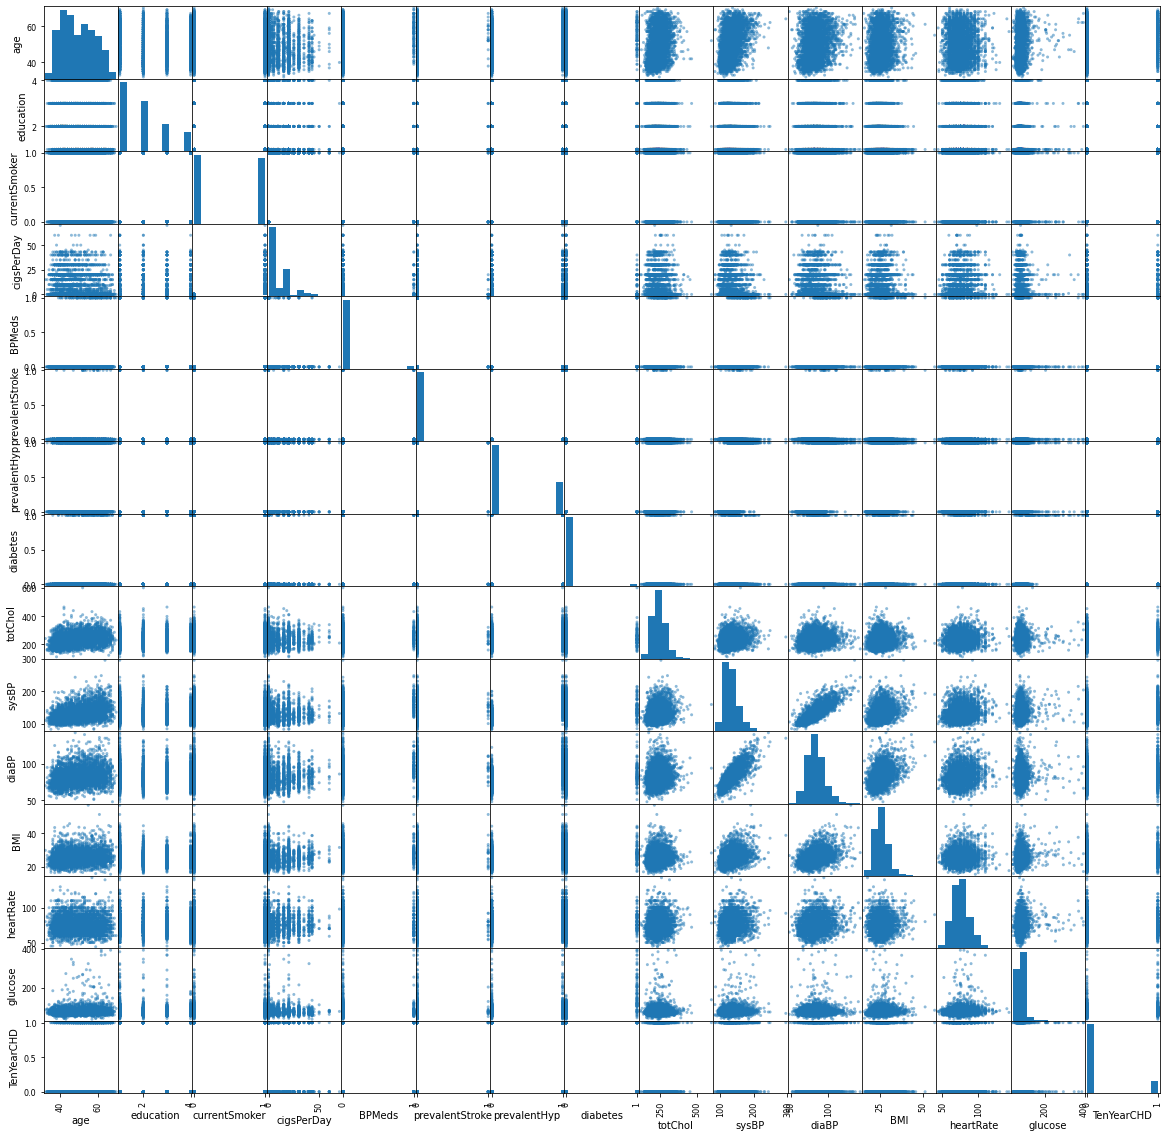

In [58]:
pd.plotting.scatter_matrix(df, figsize=(20,20))
plt.show()

In [ ]:
#Using the correlation table

In [59]:
# We pick the variables that has a correlation closer to 1 when compared with TenYearCHD

In [60]:
df.columns

Index(['age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [61]:
df_X = df[['age', 'currentSmoker', 'cigsPerDay','BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']]
#df_X = df[['age', 'BPMeds', 'prevalentHyp', 'sysBP', 'diaBP']]
df_Y = df['TenYearCHD']

In [63]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfVIF = add_constant(df_X)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

,0
const,169.968521
age,1.332241
currentSmoker,2.576062
cigsPerDay,2.517447
BPMeds,1.097869
prevalentHyp,2.046875
diabetes,1.025852
totChol,1.107486
sysBP,3.670909
diaBP,2.928804


In [64]:
# note the fact that the variance inflation factor(dfVIF) for each independent variable(age etc) is less than 10. The variables are strongly correlated 

In [65]:
# Creation of the model: Logistic Regression

In [91]:
from sklearn.model_selection import train_test_split

# Break the data
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=3000, random_state=0)

In [ ]:
# We choose test size, n value  to be 3000 less than the total of 3658

In [97]:
#df.count()

In [92]:
# Import module for cross validation
from sklearn.linear_model import LogisticRegression

# Create object
logreg =LogisticRegression()

# Fit data (with training set)
logreg.fit(X_train,Y_train)

/Users/Munaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [93]:
# Predict the test
Y_predicted = logreg.predict(X_test)
Y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [94]:
# Accuracy of the model
logreg.score(X_test, Y_test)

0.8433333333333334

In [98]:
# turns out my model is 84% accurate

In [104]:
#K-fold cross validation test
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 6, random_state = 0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv = kfold, scoring = scoring)

# Calculate the mean accuracy
results.mean()

/Users/Munaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
/Users/Munaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Munaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATION

0.858673894912427

In [105]:
# Prediction accuracy is 0.84%

In [107]:
df.rank()
df.corr('kendall')

,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.140827,-0.173120,-0.158160,0.107841,0.042549,0.253487,0.090174,0.201879,0.268251,0.146161,0.100266,-0.003723,0.077605,0.191679
education,-0.140827,1.000000,0.029396,0.020866,-0.013228,-0.026864,-0.079058,-0.041378,-0.016210,-0.100432,-0.051699,-0.109307,-0.038282,-0.017248,-0.069250
currentSmoker,-0.173120,0.029396,1.000000,0.846276,-0.051923,-0.038150,-0.108078,-0.041849,-0.042078,-0.110639,-0.101115,-0.135773,0.049487,-0.063807,0.019165
cigsPerDay,-0.158160,0.020866,0.846276,1.000000,-0.047113,-0.036634,-0.087620,-0.036644,-0.031270,-0.085596,-0.069228,-0.097957,0.050749,-0.064400,0.035587
BPMeds,0.107841,-0.013228,-0.051923,-0.047113,1.000000,0.113125,0.262910,0.049066,0.072937,0.175091,0.151129,0.074218,-0.003341,0.009796,0.089152
prevalentStroke,0.042549,-0.026864,-0.038150,-0.036634,0.113125,1.000000,0.066057,0.009625,0.013760,0.050986,0.046494,0.015117,-0.010413,0.008322,0.048366
prevalentHyp,0.253487,-0.079058,-0.108078,-0.087620,0.262910,0.066057,1.000000,0.080556,0.135906,0.573022,0.508336,0.234508,0.112523,0.072322,0.181387
diabetes,0.090174,-0.041378,-0.041849,-0.036644,0.049066,0.009625,0.080556,1.000000,0.029033,0.072512,0.038429,0.058516,0.051235,0.184088,0.093431
totChol,0.201879,-0.016210,-0.042078,-0.031270,0.072937,0.013760,0.135906,0.029033,1.000000,0.159313,0.132646,0.101079,0.064741,0.022752,0.070664
sysBP,0.268251,-0.100432,-0.110639,-0.085596,0.175091,0.050986,0.573022,0.072512,0.159313,1.000000,0.599936,0.222724,0.121245,0.081783,0.162169


In [110]:
# Regression equation

df_X = df[['age', 'currentSmoker', 'cigsPerDay','BPMeds', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate']]

TenYearCHD = 0.191679 * age + 0.019165 * currentSmoker + 0.035587 * cigsPerDay + 0.089152 * BPMeds + 0.181387 * prevalentHyp + 0.093431 * diabetes + 0.070664 * totChol + 0.162169 * sysBP + 0.108611 * diaBP + 0.064975 * BMI + 0.011533 * heartRate

Prediction Accuracy = 84%

### Another Logistic Regression

In [118]:
df_X = df[['age', 'BPMeds', 'prevalentHyp', 'sysBP', 'diaBP']]

In [119]:
df_Y = df['TenYearCHD']

In [120]:
from statsmodels.tools.tools import add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor

dfVIF = add_constant(df_X)
pd.DataFrame([variance_inflation_factor(dfVIF.values, i) for i in range(dfVIF.shape[1])], index=dfVIF.columns)

,0
const,105.125194
age,1.221681
BPMeds,1.094149
prevalentHyp,2.034987
sysBP,3.628290
diaBP,2.784181


In [121]:
from sklearn.model_selection import train_test_split

# Break the data
X_train, X_test, Y_train, Y_test = train_test_split(df_X, df_Y, test_size=3000, random_state=0)

# Import module for cross validation
from sklearn.linear_model import LogisticRegression

# Create object
logreg =LogisticRegression()

# Fit data (with training set)
logreg.fit(X_train,Y_train)


LogisticRegression()

In [122]:
# Predict the test
Y_predicted = logreg.predict(X_test)
Y_predicted

array([0, 0, 0, ..., 0, 0, 0])

In [123]:
logreg.score(X_test, Y_test)

0.8423333333333334

<AxesSubplot:>

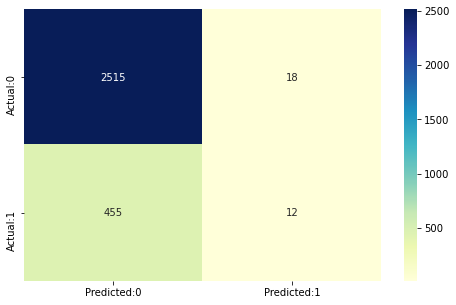

In [132]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,Y_predicted)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sn.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

### THE DATA SET IS BAD

In [124]:
#K-fold cross validation test
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

kfold = model_selection.KFold(n_splits = 6, random_state = 0)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, Y_train, cv = kfold, scoring = scoring)

# Calculate the mean accuracy
results.mean()

/Users/Munaz/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.8647762023908814